<a href="https://colab.research.google.com/github/bereacs/l01-greedy-tsp-Mahmoud-Leghlimi/blob/master/L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: FIXME

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

FIXME

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

FIXME

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

FIXME

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

FIXME

**TESTING**: Describe how you tested this work.

FIXME

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

FIXME

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

FIXME

## Import Libraries

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [7]:
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
print(tspdata)

6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 



## TSP Class

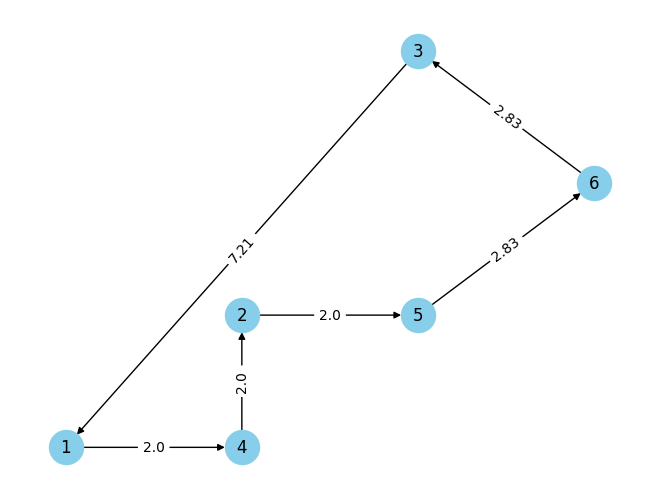

In [10]:
class TSP:
  def __init__(self):
      """Class for solving the Traveling Salesman Problem using a greedy algorithm."""
      self.nodeData = []        # raw list of nodes and coordinates
      self.graph = nx.DiGraph() # directed graph
      self.coords = {}          # {node: (x,y)}
      self.places = []          # list of all nodes
      self.route = []           # final greedy path

  def extractData(self, raw_data):
      """
      Read coordinates from raw data and store them.
      Assumes data format: node x y
      Example:
      1 10 20
      2 15 25
      """
      lines = raw_data.strip().split('\n')
      # Skip the first line which is the number of nodes
      for line in lines[1:]:
          parts = line.strip().split()
          if len(parts) == 2: # The provided data seems to have only 2 columns (x, y)
              # Assigning node numbers starting from 1
              node = len(self.nodeData) + 1
              x, y = float(parts[0]), float(parts[1])
              self.nodeData.append((node, x, y))
          elif len(parts) == 3: # Handle the case with node number
              node = int(parts[0])
              x, y = float(parts[1]), float(parts[2])
              self.nodeData.append((node, x, y))


  def setUpCoords(self):
      """Store coordinates into a dictionary {node: (x, y)}."""
      for node, x, y in self.nodeData:
          self.coords[node] = (x, y)

  def calculateDistance(self, a, b):
      """Return Euclidean distance between points a and b."""
      return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

  def listPlaces(self):
      """Return a list of all nodes."""
      return list(self.coords.keys())

  def getRoute(self, current, visited=None, notVisited=None):
      """Return greedy route starting from 'current'."""
      if visited is None:
          visited = []
      if notVisited is None:
          notVisited = self.listPlaces()

      visited.append(current)
      notVisited = [n for n in notVisited if n != current]

      # base case: all nodes visited
      if not notVisited:
          return visited

      # pick closest unvisited node
      next_node = min(notVisited, key=lambda n: self.calculateDistance(self.coords[current], self.coords[n]))

      return self.getRoute(next_node, visited, notVisited)

  def beGreedy(self, start):
      """Run greedy algorithm and close the cycle."""
      self.route = self.getRoute(start)
      self.route.append(start)  # return to start

  def addNodes(self):
      """Add nodes to the graph."""
      for node, x, y in self.nodeData:
          self.graph.add_node(node, pos=(x, y))


  def addEdges(self):
      """Add edges for the greedy route with weights."""
      for i in range(len(self.route) - 1):
          a, b = self.route[i], self.route[i+1]
          dist = self.calculateDistance(self.coords[a], self.coords[b])
          self.graph.add_edge(a, b, weight=round(dist, 2))

  def showGraph(self):
      """Display the graph with labels."""
      pos = nx.get_node_attributes(self.graph, 'pos')
      labels = nx.get_edge_attributes(self.graph, 'weight')

      nx.draw(self.graph, pos, with_labels=True, node_size=600, node_color="skyblue")
      nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=labels)
      plt.show()

# Main execution
tsp = TSP()
tsp.extractData(tspdata)
tsp.setUpCoords()
tsp.addNodes()
tsp.beGreedy(1)   # start at node 1
tsp.addEdges()
tsp.showGraph()